
<img src="img/viu_logo.png" width="200">

## 01MIAR - Estructuras de datos, Pandas

![logo](img/python_logo.png)

*Ivan Fuertes*

# Sumario
- Series y DataFrame
- Indexacion, slicing
- Grabar y cargar a archivo
- MovieLens dataset 

# Pandas
- Librería (de facto estándar) para estructurar datos tabulares
- Multivariable (string, int, float, bool...)
- Dos clases:
  - Series (1 dimensión)
  - DataFrames (2+ dimensiones)

In [2]:
# librería externa
import pandas as pd
from pandas import Series, DataFrame

# Series
- Datos unidimensionales (similar a NumPy)
- Elementos + índices modificables

In [4]:
countries = pd.Series(['Spain','Andorra','Gibraltar','Portugal','France'])
print(countries)

0        Spain
1      Andorra
2    Gibraltar
3     Portugal
4       France
dtype: object


In [5]:
# especificando el índice
countries = pd.Series(['Spain','Andorra','Gibraltar','Portugal','France'],
                       index=range(10,60,10))
print(countries)

10        Spain
20      Andorra
30    Gibraltar
40     Portugal
50       France
dtype: object


In [8]:
# los índices pueden ser de más tipos
football_cities = pd.Series(['Barcelona','Madrid','Valencia','Sevilla'], 
                            index=['a','b','c','d'])
print(football_cities)

a    Barcelona
b       Madrid
c     Valencia
d      Sevilla
dtype: object


In [9]:
# Atributos
football_cities.name = 'Ciudades con dos equipos en primera' # nombrar la Serie
football_cities.index.name = 'Id' # Describir los índices
print(football_cities)

Id
a    Barcelona
b       Madrid
c     Valencia
d      Sevilla
Name: Ciudades con dos equipos en primera, dtype: object


In [10]:
# acceso similar a NumPy o listas, según posición
print(football_cities[2])

# acceso a través del índice semántico
print(football_cities['c'])

print(football_cities['c'] == football_cities[2])

Valencia
Valencia
True


# Tratamiento similar a ndarray

In [11]:
# múltiple recolección de elementos
print(football_cities[ ['a','c'] ])
print(football_cities[ [0, 3] ])

Id
a    Barcelona
c     Valencia
Name: Ciudades con dos equipos en primera, dtype: object
Id
a    Barcelona
d      Sevilla
Name: Ciudades con dos equipos en primera, dtype: object


In [ ]:
# slicing
print(football_cities[:'c']) # incluye ambos extremos con el indice semantico
print(football_cities[:2])

In [ ]:
#cast a list
lista = list(football_cities[:'c'])
print(lista)

In [ ]:
#cast a ndarray
import numpy as np

cities = np.array(football_cities[:'c'])
print(cities)
print(type(cities))

In [ ]:
# uso de masks para seleccionar
fibonacci = pd.Series([0, 1, 1, 2, 3, 5, 8, 13, 21])

mask = fibonacci > 10
print(mask)
print(fibonacci[mask])

dst = pd.Series([13,21])
print(dst)

fb = fibonacci[mask]
fb.reset_index(drop=True,inplace=True)
print(fb)

dst.equals(fb)

In [ ]:
# aplicar funciones de numpy a la serie
import numpy as np

np.sum(fibonacci)

In [ ]:
#filtrado con np.where
distances = pd.Series([12.1,np.nan,12.8,76.9,6.1,7.2])

valid_distances = np.where(pd.notnull(distances),distances,0)

print(valid_distances)
print(type(valid_distances))

### Iteración

In [ ]:
# iterar sobre elementos
for value in fibonacci:
    print('Value: ' + str(value))

# iterar sobre indices
for index in fibonacci.index:
    print('Index: ' + str(index))

In [ ]:
# iterar sobre elementos e índices al mismo tiempo
for index, value in fibonacci.items():
    print('Index: ' + str(index) + '  Value: ' + str(value))

In [ ]:
for index, value in zip(fibonacci.index, fibonacci):
    print('Index: ' + str(index) + '  Value: ' + str(value))  

## Series como diccionarios
- Interpretar el índice como clave
- Acepta operaciones para diccionarios

In [3]:
# crear una serie a partir de un diccionario
serie = pd.Series( { 'Carlos' : 100, 'Marcos': 98} )

print(serie.index)
print(serie.values)

print(serie)
print(type(serie))

Index(['Carlos', 'Marcos'], dtype='object')
[100  98]
Carlos    100
Marcos     98
dtype: int64
<class 'pandas.core.series.Series'>


In [ ]:
# añade y elimina elementos a través de índices
serie['Pedro'] = 12
del serie['Marcos']
print(serie)

In [ ]:
# query una serie
# print(serie['Marcos'])

if 'Marcos' in serie:
    print(serie['Marcos'])
    
print(serie)

## Operaciones entre series

In [ ]:
# suma de dos series
# suma de valores con el mismo índice (NaN si no aparece en ambas)
serie1 = pd.Series([10,20,30,40], index=range(4) )
serie2 = pd.Series([1,2,3], index=range(3) )
print(serie1 + serie2)

In [ ]:
# resta de series (similar a la suma)
print(serie1 - serie2)

In [ ]:
# operaciones de pre-filtrado
result = serie1 + serie2
result[pd.isnull(result)] = 0 # mask con isnull()
print(result)

###  Diferencias entre Pandas Series y diccionario
* Diccionario, es una estructura que relaciona las claves y los valores de forma arbitraria.
* Series, estructura de forma estricta listas de valores con listas de índice asignado en la posición.
* Series, es más eficiente para ciertas operaciones que los dicionarios.
* En las Series los valores de entrada pueden ser listas o Numpy arrays.
* En Series los índices semánticos pueden ser integers o caracteres, en los valores igual.
* Series se podría entender entre una lista y un diccionario Python, pero es de una dimensión.

# DataFrame
- Datos tabulares (filas x columnas)
- Columnas: Series con índices compartidos

In [66]:
querylist = pd.DataFrame({"queryid":[],"Status":[]})
querylist.set_index('queryid', inplace=True)
display(querylist)

,Status
queryid,


In [67]:
querylist.loc[1020] =  'FAILED'
querylist.loc[1021] = 'FINISHED'
querylist.loc[1022] = 'FAILED'
querylist.loc[1023] = 'FINISHED'
querylist.loc[1024] = 'FAILED'

In [45]:
querylist.loc[1020] =  None
querylist.loc[1021] = 'FINISHED'
querylist.loc[1022] = 'FAILED'
querylist.loc[1023] = 'FINISHED'
querylist.loc[1024] = 'RUNNING'

display(querylist)

,Status
queryid,
1020,None
1021,FINISHED
1022,FAILED
1023,FINISHED
1024,RUNNING


In [44]:
for index, row in querylist.iterrows():
    print(row['Status'])
    querylist.loc[index]='FINISH'

display(querylist)

nan
FINISHED
FAILED
FINISHED
RUNNING


,Status
queryid,
1020,FINISH
1021,FINISH
1022,FINISH
1023,FINISH
1024,FINISH


In [61]:
querylist[ (querylist['Status'].isin(['FINISHED','FAILED']))].index

Int64Index([1021, 1022, 1023], dtype='int64', name='queryid')

In [68]:
display(querylist)
queryFinish = querylist[ (querylist['Status'].isin(['FINISHED','FAILED']))].index
querylist.drop(queryFinish, inplace=True)
display(querylist)

,Status
queryid,
1020,FAILED
1021,FINISHED
1022,FAILED
1023,FINISHED
1024,FAILED


,Status
queryid,


In [69]:
print(len(querylist))

0


In [70]:
int('2')

2

In [12]:
# crear un DataFrame a partir de un diccionario de elementos de la misma longitud
diccionario = { "Nombre" : ["Marisa","Laura","Manuel"], 
                "Edad" : [34,29,12] }

# las claves identifican columnas
frame = pd.DataFrame(diccionario)
display(frame)

,Nombre,Edad
0,Marisa,34
1,Laura,29
2,Manuel,12


In [ ]:
# crear un DataFrame a partir de un diccionario de elementos de la misma longitud
diccionario = { "Nombre" : ["Marisa","Laura","Manuel"], 
                "Edad" : [34,29,12] }

# las claves identifican columnas
frame = pd.DataFrame(diccionario, index = ['a', 'b', 'c'])
display(frame)

In [ ]:
# además de 'index', el parámetro 'columns' especifica el número y orden de las columnas
frame = pd.DataFrame(diccionario, columns = ['Nacionalidad', 'Nombre', 'Edad', 'Profesion'])
display(frame)

In [ ]:
# acceso a columnas
nombres = frame['Nombre']
display(nombres)
type(nombres)

In [ ]:
#siempre que el nombre de la columna lo permita (espacios, ...)
nombres = frame.Nombre
display(nombres)
type(nombres)

In [ ]:
# acceso al primer nombre del DataFrame frame??
print(frame['Nombre'][0])
print(frame.Nombre[0])
print(nombres[0])

### Formas de crear un DataFrame
* Con una Serie de pandas
* Lista de diccionarios
* Dicionario de Series de Pandas
* Con un array de Numpy de dos dimensiones
* Con array estructurado de Numpy 

## Modificar DataFrames

In [ ]:
# añadir columnas
diccionario = { "Nombre" : ["Marisa","Laura","Manuel"], 
                "Edad" : [34,29,12] }

frame = pd.DataFrame(diccionario,columns=['Nacionalidad', 'Nombre', 'Edad', 'Profesion'])
frame['Direccion'] = 'Desconocida'
display(frame)

In [ ]:
# añadir fila (requiere todos los valores)
user_2 = ['Alemania','Klaus',20, 'none', 'Desconocida']
frame.loc[100] = user_2
display(frame)

In [ ]:
# eliminar fila (similar a Series)
frame = pd.DataFrame(diccionario,columns=['Nacionalidad', 'Nombre', 'Edad', 'Profesion'])

# frame = frame.drop(2) # por qué necesitamos reasignar el frame?
# display(frame)

frame.drop(2, axis=0, inplace = True)
display(frame)

In [ ]:
#eliminar columna
del frame['Profesion']
display(frame)

In [ ]:
# acceder a la traspuesta (como una matriz)
display(frame.T)

## Iteración

In [ ]:
# iteración sobre el DataFrame?
frame = pd.DataFrame(diccionario, columns=['Nacionalidad', 'Nombre', 'Edad', 'Profesion'])

for a in frame:
    print(a) # qué es 'a'?
    print(type(a))

In [ ]:
# iteracion sobre filas
for value in frame.values:
    print(value)
    print(type(value))

In [ ]:
# iterar sobre filas y luego sobre cada valor?
for values in frame.values:
    for value in values: 
        print(value)

## Indexación y slicing con DataFrames

In [ ]:
d1 = {'ciudad':'Valencia', 'temperatura':10, 'o2':1}
d2 = {'ciudad':'Barcelona', 'temperatura':8}
d3 = {'ciudad':'Valencia', 'temperatura':9}
d4 = {'ciudad':'Madrid', 'temperatura':10, 'humedad':80}
d5 = {'ciudad':'Sevilla', 'temperatura':15, 'humedad':50, 'co2':6}
d6 = {'ciudad':'Valencia', 'temperatura':10, 'humedad':90, 'co2':10}

ls_data = [d1, d2, d3, d4, d5, d6]  # lista de diccionarios
df_data = pd.DataFrame(ls_data, index = list('abcdef'))
display(df_data)

In [ ]:
# Acceso a un valor concreto por indice posicional [row, col]
print(df_data.iloc[1,1])

# Acceso a todos los valores hasta un índice por enteros
display(df_data.iloc[:3,:4])

# Acceso a datos de manera explícita, indice semantico (se incluyen)
display(df_data.loc['d', 'temperatura'])
display(df_data.loc[:'c', :'o2'])
display(df_data.loc[:'c', 'temperatura':'o2'])

display(df_data.loc[:, ['ciudad','o2']])

In [ ]:
# indexación con nombre de columna (por columnas)
print(df_data['ciudad']) # --> Series

display(df_data[['ciudad', 'o2']])

In [ ]:
# indexación con índice posicional (no permitido!). Esto busca columna.
# df_data[0]

In [ ]:
# indexar por posición con 'iloc'
print(df_data.iloc[0]) # --> Series de la primera fila (qué marca los índices)

In [ ]:
# indexar semántico con 'loc'
df_data.loc['a'] # --> Series de la fila con índice 'a'

In [ ]:
# indexar semántico con 'loc'
df_data.loc[:'b'] # --> DataFrame de la fila con índice 'a'

In [ ]:
# si se modifica una porcion del dataframe se modifica el dataframe original (referencia)
serie = df_data.loc['a']
serie[2] = 3000

display(df_data)

# copiar data frame
df_2 = df_data.copy()

In [ ]:
# ambos aceptan 'axis' como argumento
# df_data.iloc(axis=1)[0] # --> todos los valores asignados a la primera columna 'ciudad'
df_data.loc(axis=1)['ciudad'] # --> equivalente frame['ciudad']

In [ ]:
# qué problema puede tener este fragmento?
frame = pd.DataFrame({"Name" : ['Carlos','Pedro'], "Age" : [34,22]}, index=[1,0])
display(frame)

In [ ]:
# por defecto, pandas interpreta índice posicional --> error en frames
# cuando hay posible ambigüedad, utilizar loc y iloc
print('Primera fila\n')
print(frame.iloc[0])
print('\nElemento con index 0\n')
print(frame.loc[0])

## Objeto Index de Pandas

In [ ]:
# Contrucción de índices
ind = pd.Index([2, 3, 5, 23, 26])
# recuperar datos
print(ind[3])
print(ind[::2])

In [ ]:
# usar un objeto index al crear dataframe
frame = pd.DataFrame({"Name" : ['Carlos','Pedro', 'Manolo', 'Luis', 'Alberto'], "Age" : [34,22,15,55,23]}, index=ind)
display(frame)

In [ ]:
# Son inmutables! No se modifican los datos. 
ind[3] = 8

## Slicing

In [ ]:
# slice por filas
d_and_d_characters = {'Name' : ['bundenth','theorin','barlok'], 'Strength' : [10,12,19], 'Wisdom' : [20,13,6]}
character_data = pd.DataFrame(d_and_d_characters, index=['a','b','c'])
display(character_data)
display(character_data[:-1])
display(character_data[1:2])

In [ ]:
# slicing para columnas
display(character_data[['Name','Wisdom']])

In [ ]:
#slicing con 'loc' e 'iloc'
display(character_data.iloc[1:])
display(character_data.loc[:'b','Name':'Strength'])

¿Cómo filtrar filas y columnas? Por ejemplo, para todos los personajes, obtener 'Name' y 'Strength'

In [ ]:
# usando 'loc' para hacer slicing
display(character_data.loc[:,'Name':'Strength'])

In [ ]:
# usando 'loc' para buscar específicamente filas y columnas
display(character_data.loc[ ['a','c'], ['Name','Wisdom'] ])

In [ ]:
# lo mismo con 'iloc'?
display(character_data.iloc[[0,2],[0,2]])
display(character_data.iloc[[0,-1],[0,-1]])

In [ ]:
# lista de los personajes con el atributo Strength > 11
display(character_data.loc[character_data['Strength'] > 11, ['Name', 'Strength']])

In [ ]:
# listar los personajes con Strength > 15 o Wisdom > 15
display(character_data.loc[(character_data['Strength'] > 15) | (character_data['Wisdom'] > 15)])

# Cargar y guardar datos en pandas

In [ ]:
# Guardar a csv
import os
ruta = os.path.join("res" ,"o_d_d_characters.csv")

character_data.to_csv(ruta, sep=';') # sep por defecto: ','

In [ ]:
loaded = pd.read_csv(ruta, sep=';')
display(loaded)

In [ ]:
loaded = pd.read_csv(ruta, sep=';', index_col = 0)
display(loaded)

#### otros argumentos to_csv()
- na_rep='string' --> representar valores NaN en el archivo csv

#### otros argumentos read_csv()
- na_values='string'


Pandas también ofrece funciones para leer/guardar a otros formatos estándares: JSON, HDF5 o Excel en su [API](https://pandas.pydata.org/pandas-docs/stable/reference/io.html)

# Ejemplo práctico en pandas
- [MovieLens dataset](https://grouplens.org/datasets/movielens/)
 - Reviews de películas
 - 1 millón de entradas
 - Datos demográficos de usuarios

In [1]:
import numpy as np
import pandas as pd
import zipfile # para descomprimir archivos zip
import urllib.request # para descargar de URL
import os

# descargar MovieLens dataset
url = 'http://files.grouplens.org/datasets/movielens/ml-1m.zip'  
ruta = os.path.join("res", "ml-1m.zip")
urllib.request.urlretrieve(url, ruta)

('res\\ml-1m.zip', <http.client.HTTPMessage at 0x1bbffccbdf0>)

In [2]:
# descomprimiendo archivo zip
ruta_ext = os.path.join("res")
with zipfile.ZipFile(ruta, 'r') as z: 
    print('Extracting all files...') 
    z.extractall(ruta_ext) # destino
    print('Done!') 
    
# take a look at readme y revisar formatos

Extracting all files...
Done!


In [3]:
ruta_users = os.path.join("res", "ml-1m", "users.dat")

users_dataset = pd.read_csv(ruta_users, sep='::', index_col=0, engine='python')
display(users_dataset)

,F,1.1,10,48067
1,,,,
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455
6,F,50,9,55117
...,...,...,...,...
6036,F,25,15,32603
6037,F,45,1,76006
6038,F,56,1,14706


In [4]:
# Varios problemas
# sin cabecera! primer valor se ha perdido
# las columnas no tienen nombres
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePathOrBuffer',
    sep=<no_default>,
    delimiter=None,
    header='infer',
    names=<no_default>,
    index_col=None,
    usecols=None,
    squeeze=False,
    prefix=<no_default>,
    mangle_dupe_cols=True,
    dtype: 'DtypeArg | None' = None,
    engine=None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace=False,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    na_values=None,
    keep_default_na=True,
    na_filter=True,
    verbose=False,
    skip_blank_lines=True,
    parse_dates=False,
    infer_datetime_format=False,
    keep_date_col=False,
    date_parser=None,
    dayfirst=False,
    cache_dates=True,
    iterator=False,
    chunksize=None,
    compression='infer',
    thousands=None,
    decimal: 'str' = '.',
    lineterminator=None,
    quotechar='"',
    quoting=0,
    doublequote=True,
    escapechar=None,
    comment=None,
    encoding=None,
    encoding_errors: 'str | N

In [5]:
# especificar nombres, cargar sin cabecera
users_dataset = pd.read_csv(ruta_users, sep='::', index_col=0,
    header=None, names=['UserID','Gender','Age','Occupation','Zip-code'], engine='python')
display(users_dataset)

,Gender,Age,Occupation,Zip-code
UserID,,,,
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455
...,...,...,...,...
6036,F,25,15,32603
6037,F,45,1,76006
6038,F,56,1,14706


In [6]:
# samplear la tabla 
display(users_dataset.sample(10))

,Gender,Age,Occupation,Zip-code
UserID,,,,
1402,M,18,4,90601
1743,M,35,17,77566
1844,F,18,4,53711
2727,M,25,11,60603
1212,F,50,1,60089
1850,M,18,5,12582
1883,F,50,0,94521
5132,M,35,7,77565
1392,M,45,3,90006


In [7]:
# samplear la cabeza
display(users_dataset.head(4))

,Gender,Age,Occupation,Zip-code
UserID,,,,
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460


In [8]:
# samplear la cola
display(users_dataset.tail(4))

,Gender,Age,Occupation,Zip-code
UserID,,,,
6037,F,45,1,76006
6038,F,56,1,14706
6039,F,45,0,01060
6040,M,25,6,11106


In [9]:
# tipos de datos sobre las columnas
users_dataset.dtypes

Gender        object
Age            int64
Occupation     int64
Zip-code      object
dtype: object

In [10]:
display(users_dataset[users_dataset['Zip-code'].str.len() > 5])

,Gender,Age,Occupation,Zip-code
UserID,,,,
161,M,45,16,98107-2117
233,F,45,20,37919-4204
293,M,56,1,55337-4056
458,M,50,16,55405-2546
506,M,25,16,55103-1006
...,...,...,...,...
5682,M,18,0,23455-4959
5904,F,45,12,954025
5925,F,25,0,90035-4444


In [11]:
# información general sobre atributos numéricos
display(users_dataset.describe())

,Age,Occupation
count,6040.000000,6040.000000
mean,30.639238,8.146854
std,12.895962,6.329511
min,1.000000,0.000000
25%,25.000000,3.000000
50%,25.000000,7.000000
75%,35.000000,14.000000
max,56.000000,20.000000


In [12]:
users_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6040 entries, 1 to 6040
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Gender      6040 non-null   object
 1   Age         6040 non-null   int64 
 2   Occupation  6040 non-null   int64 
 3   Zip-code    6040 non-null   object
dtypes: int64(2), object(2)
memory usage: 235.9+ KB


In [13]:
# incluir otros atributos (no todo tiene sentido)
display(users_dataset.describe(include='all'))

,Gender,Age,Occupation,Zip-code
count,6040,6040.000000,6040.000000,6040
unique,2,NaN,NaN,3439
top,M,NaN,NaN,48104
freq,4331,NaN,NaN,19
mean,NaN,30.639238,8.146854,NaN
std,NaN,12.895962,6.329511,NaN
min,NaN,1.000000,0.000000,NaN
25%,NaN,25.000000,3.000000,NaN
50%,NaN,25.000000,7.000000,NaN
75%,NaN,35.000000,14.000000,NaN


In [14]:
# cuántos usuarios son mujeres (Gender='F')
len(users_dataset[users_dataset['Gender'] == 'F'])

# select count(*) from users_dataset where users_dataset.Gender = 'F'

1709

In [15]:
# mostrar solo los menores de edad
under_age = users_dataset[users_dataset['Age'] == 1]
print(len(under_age))
display(under_age.sample(10))

222


,Gender,Age,Occupation,Zip-code
UserID,,,,
4606,F,1,10,90291
2418,F,1,10,06074
2245,M,1,10,60007
2133,F,1,10,01607
3234,F,1,0,90012
1096,M,1,10,80439
1084,M,1,19,03226
1263,M,1,10,81301
940,M,1,10,76240


In [16]:
# filtrar edad incorrecta (míninimo 18) SettingWithCopyWarning!!!
users_dataset = pd.read_csv(ruta_users, sep='::', index_col=0,
    header=None, names=['UserID','Gender','Age','Occupation','Zip-code'], engine='python')
under_age = users_dataset[users_dataset['Age'] == 1]

# under_age.loc['Age'] = np.nan
# display(under_age.head())

users_dataset[users_dataset['Age'] < 18] = under_age
display(users_dataset.head())

,Gender,Age,Occupation,Zip-code
UserID,,,,
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455


In [17]:
# filtrar edad incorrecta (míninimo 18) Fixing it by Copying the slice
users_dataset = pd.read_csv(ruta_users, sep='::', index_col=0,
    header=None, names=['UserID','Gender','Age','Occupation','Zip-code'], engine='python')
under_age = users_dataset[users_dataset['Age'] == 1]

under_age_copy = under_age.copy()
under_age_copy['Age'] = np.nan
display(under_age_copy.head())

users_dataset[users_dataset['Age'] < 18] = under_age_copy
display(users_dataset.head())

,Gender,Age,Occupation,Zip-code
UserID,,,,
1,F,NaN,10,48067
19,M,NaN,10,48073
51,F,NaN,10,10562
75,F,NaN,10,01748
86,F,NaN,10,54467


,Gender,Age,Occupation,Zip-code
UserID,,,,
1,F,NaN,10,48067
2,M,56.0,16,70072
3,M,25.0,15,55117
4,M,45.0,7,02460
5,M,25.0,20,55455


In [18]:
# filtrar edad incorrecta (míninimo 18) Remove them from the dataset
users_dataset = pd.read_csv(ruta_users, sep='::', index_col=0,
    header=None, names=['UserID','Gender','Age','Occupation','Zip-code'], engine='python')

display(users_dataset[users_dataset['Age'] == 1].head(4))

users_dataset.loc[users_dataset['Age'] == 1,'Age'] = np.nan
display(users_dataset.loc[pd.isnull(users_dataset['Age'])].head(4))

users_dataset.drop(users_dataset[pd.isnull(users_dataset['Age'])].index, inplace = True)
display(users_dataset.head(4))

,Gender,Age,Occupation,Zip-code
UserID,,,,
1,F,1,10,48067
19,M,1,10,48073
51,F,1,10,10562
75,F,1,10,01748


,Gender,Age,Occupation,Zip-code
UserID,,,,
1,F,NaN,10,48067
19,M,NaN,10,48073
51,F,NaN,10,10562
75,F,NaN,10,01748


,Gender,Age,Occupation,Zip-code
UserID,,,,
2,M,56.0,16,70072
3,M,25.0,15,55117
4,M,45.0,7,02460
5,M,25.0,20,55455


In [19]:
# Agrupar datos por atributos
display(users_dataset.groupby(by='Gender').describe())

Age                                                     Occupation  \
         count       mean        std   min   25%   50%   75%   max      count   
Gender                                                                          
F       1631.0  32.287554  11.792015  18.0  25.0  25.0  45.0  56.0     1631.0   
M       4187.0  31.568665  11.716053  18.0  25.0  25.0  35.0  56.0     4187.0   

                                                       
            mean       std  min  25%  50%   75%   max  
Gender                                                 
F       6.498467  5.960285  0.0  1.0  4.0  11.0  20.0  
M       8.743253  6.441753  0.0  4.0  7.0  15.0  20.0

In [20]:
# Grabar la tabla modificada
# Cambiar el separador a ','
# Guardar NaN como 'null'
ruta_output = os.path.join('res', 'ml-1m', 'o_users_processed.csv')
users_dataset.to_csv(ruta_output, sep=',',na_rep='null')

# Ejercicios
- Hacer un análisis general de los otros dos archivos CSV en ml-1m ('movies.dat' y 'ratings.dat')
- Analizando el dataset ratings.dat, ¿hay algún usuario que no tenga ninguna review? ¿Cuántos tienen menos de 30 reviews?

In [22]:
ruta_ratings = os.path.join("res", "ml-1m", "ratings.dat")

ratings_dataset = pd.read_csv(ruta_ratings, sep='::', index_col=0, engine='python')
display(ratings_dataset)



,1193,5,978300760
1,,,
1,661,3,978302109
1,914,3,978301968
1,3408,4,978300275
1,2355,5,978824291
1,1197,3,978302268
...,...,...,...
6040,1091,1,956716541
6040,1094,5,956704887
6040,562,5,956704746


In [23]:
ratings_dataset = pd.read_csv(ruta_ratings, sep='::', #index_col=0,
    header=None, names=['UserID','MovieID','Rating','Date'], engine='python')
display(ratings_dataset)

,UserID,MovieID,Rating,Date
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [36]:
combined_dataset = users_dataset.merge(ratings_dataset, on='UserID', how='left')
display(combined_dataset.head(5))
print(len(combined_dataset))

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Date
0,2,M,56.0,16,70072,1357,5,978298709
1,2,M,56.0,16,70072,3068,4,978299000
2,2,M,56.0,16,70072,1537,4,978299620
3,2,M,56.0,16,70072,647,3,978299351
4,2,M,56.0,16,70072,2194,4,978299297


972998


In [52]:
#len(combined_dataset[combined_dataset["MovieID"] == np.nan])

len(combined_dataset[pd.isnull(combined_dataset['MovieID'])])
len(combined_dataset[pd.isnull(combined_dataset.MovieID)])


#len(users_dataset[users_dataset['Gender'] == 'F'])


0

In [43]:
len(combined_dataset[combined_dataset.MovieID == np.nan])

0

In [41]:
dsa= combined_dataset.groupby(by='UserID').count()
len(dsa[dsa["MovieID"]<30])

721

In [47]:
minus30 = dsa[dsa.MovieID<30]



(array([84., 89., 73., 76., 78., 72., 59., 62., 58., 70.]),
 array([20. , 20.9, 21.8, 22.7, 23.6, 24.5, 25.4, 26.3, 27.2, 28.1, 29. ]),
 <BarContainer object of 10 artists>)

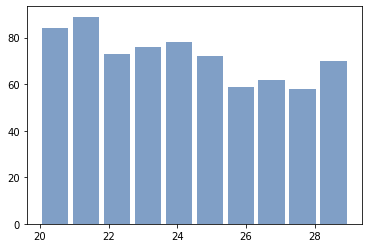

In [49]:
import matplotlib.pyplot as plt

plt.hist(x=minus30['MovieID'],  
        color='#6087b8',
         linewidth=1,alpha=0.8
        , rwidth=0.85)

In [28]:
ratings_dataset.groupby(by='UserID').describe()


MovieID                                                             \
         count         mean          std    min      25%     50%      75%   
UserID                                                                      
1         53.0  1560.547170   935.976178    1.0   783.00  1270.0  2340.00   
2        129.0  1784.015504  1040.349122   21.0  1096.00  1687.0  2571.00   
3         51.0  1787.450980  1007.032975  104.0  1196.50  1394.0  2543.50   
4         21.0  1932.000000  1070.516184  260.0  1198.00  1387.0  2947.00   
5        198.0  1762.747475  1079.861293    6.0   873.50  1725.5  2712.00   
...        ...          ...          ...    ...      ...     ...      ...   
6036     888.0  1855.752252  1003.534508    4.0  1080.75  1936.0  2712.25   
6037     202.0  1773.579208   967.878120   17.0  1033.50  1578.5  2528.50   
6038      20.0  1640.650000   955.084580  232.0  1145.00  1286.0  2284.50   
6039     123.0  1546.235772   899.497875   48.0   923.50  1211.0  2135.00   
6040     341.0  1739.920821   990.728043    1.0  1096.00  1554.0  2513.00   

               Rating            ...             Date                \
           max  count      mean  ...  75%  max  count          mean   
UserID                           ...                                  
1       3408.0   53.0  4.188679  ...  5.0  5.0   53.0  9.784297e+08   
2       3893.0  129.0  3.713178  ...  5.0  5.0  129.0  9.782993e+08   
3       3868.0   51.0  3.901961  ...  5.0  5.0   51.0  9.782978e+08   
4       3702.0   21.0  4.190476  ...  5.0  5.0   21.0  9.782942e+08   
5       3799.0  198.0  3.146465  ...  4.0  5.0  198.0  9.782445e+08   
...        ...    ...       ...  ...  ...  ...    ...           ...   
6036    3576.0  888.0  3.302928  ...  4.0  5.0  888.0  9.567280e+08   
6037    3543.0  202.0  3.717822  ...  4.0  5.0  202.0  9.567261e+08   
6038    3548.0   20.0  3.800000  ...  5.0  5.0   20.0  9.567093e+08   
6039    3549.0  123.0  3.878049  ...  4.0  5.0  123.0  9.567083e+08   
6040    3819.0  341.0  3.577713  ...  4.0  5.0  341.0  9.605139e+08   

                                                                          \
                 std          min          25%          50%          75%   
UserID                                                                     
1       2.270962e+05  978300019.0  978301398.0  978302039.0  978302281.0   
2       6.054037e+02  978298124.0  978298813.0  978299297.0  978299839.0   
3       4.239870e+02  978297018.0  978297539.0  978297757.0  978298147.0   
4       1.165415e+02  978293924.0  978294199.0  978294230.0  978294260.0   
5       1.477219e+03  978241072.0  978243170.0  978244808.0  978245763.0   
...              ...          ...          ...          ...          ...   
6036    1.983400e+04  956709349.0  956711270.0  956716780.0  956753311.0   
6037    3.011010e+04  956708997.0  956709629.0  956718700.0  956719206.0   
6038    3.582094e+03  956706827.0  956707005.0  956707604.0  956709471.5   
6039    1.130632e+04  956705158.0  956705497.0  956705811.0  956706035.0   
6040    1.004751e+07  956703932.0  956715455.0  956716438.0  957717557.0   

                     
                max  
UserID               
1       978824351.0  
2       978300174.0  
3       978298504.0  
4       978294282.0  
5       978246585.0  
...             ...  
6036    956755196.0  
6037    956801840.0  
6038    956717204.0  
6039    956758029.0  
6040    998315055.0  

[6040 rows x 24 columns]